In [146]:
import pandas as pd
import psycopg2

CONNECT_DB = "host=localhost port=5432 dbname=cloud_user user=cloud_user password=cloud_user"

In [147]:
create_table_query = '''CREATE TABLE weekend(
    Source varchar (225) ,
    Target varchar (225),
    Weight float,
    typeTrans varchar (225),
    fraud int
); '''
try:
    # Make connection to db
    cxn = psycopg2.connect(CONNECT_DB)

    # Create a cursor to db
    cur = cxn.cursor()
    
    # Send sql query to request
    cur.execute(create_table_query)
    records = cxn.commit()

except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
    
finally:
    #closing database connection.
    if(cxn):
        cur.close()
        cxn.close()
        print("PostgreSQL connection is closed")

print(f'Records:\n {records}')


Error while connecting to PostgreSQL relation "weekend" already exists

PostgreSQL connection is closed
Records:
 [('C10938261DD', 'M3489346DD', 4.77, 'es_transportationDD', 23), ('C10938261DD', 'M3489346DD', 4.77, 'es_transportationDD', 23)]


In [148]:
try:
    # Make connection to db
    cxn = psycopg2.connect(CONNECT_DB)
    
    # Create a cursor to db
    cur = cxn.cursor()
    
    with open('./weekend.csv', 'r') as f:
        # skip first row, header row
        next(f)
        cur.copy_from(f, 'weekend', sep=",")
        cxn.commit()

except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
    
finally:
    #closing database connection.
    if(cxn):
        cur.close()
        cxn.close()
        print("PostgreSQL connection is closed")
        print("weekend table populated")


PostgreSQL connection is closed
weekend table populated


In [149]:
def db_server_fetch(sql_query):
    try:
        # Make connection to db
        cxn = psycopg2.connect(CONNECT_DB)

        # Create a cursor to db
        cur = cxn.cursor()

        # Send sql query to request
        cur.execute(sql_query)
        records = cur.fetchall()

    except (Exception, psycopg2.Error) as error :
        print ("Error while connecting to PostgreSQL", error)

    finally:
        #closing database connection.
        if(cxn):
            cur.close()
            cxn.close()
            print("PostgreSQL connection is closed")
        return records

In [150]:
select_query = '''SELECT * FROM weekend LIMIT 5;'''

records = db_server_fetch(select_query)
print(records)


PostgreSQL connection is closed
[("'C1093826151'", "'M348934600'", 4.55, "'es_transportation'", 0), ("'C352968107'", "'M348934600'", 39.68, "'es_transportation'", 0), ("'C2054744914'", "'M1823072687'", 26.89, "'es_transportation'", 0), ("'C1760612790'", "'M348934600'", 17.25, "'es_transportation'", 0), ("'C757503768'", "'M348934600'", 35.72, "'es_transportation'", 0)]


In [151]:
records

[("'C1093826151'", "'M348934600'", 4.55, "'es_transportation'", 0),
 ("'C352968107'", "'M348934600'", 39.68, "'es_transportation'", 0),
 ("'C2054744914'", "'M1823072687'", 26.89, "'es_transportation'", 0),
 ("'C1760612790'", "'M348934600'", 17.25, "'es_transportation'", 0),
 ("'C757503768'", "'M348934600'", 35.72, "'es_transportation'", 0)]

In [152]:
def db_server_change(sql_query):
    try:
        # Make connection to db
        cxn = psycopg2.connect(CONNECT_DB)

        # Create a cursor to db
        cur = cxn.cursor()

        # Send sql query to request
        cur.execute(sql_query)
        records = conn.commit()

    except (Exception, psycopg2.Error) as error :
        print ("Error while connecting to PostgreSQL", error)

    finally:
        #closing database connection.
        if(cxn):
            cur.close()
            cxn.close()
            print("PostgreSQL connection is closed")
        return records

In [153]:
def db_server_change(sql_query):
    records = None
    try:
        # Make connection to the database
        conn = psycopg2.connect(CONNECT_DB)

        # Create a cursor to the database
        cur = conn.cursor()

        # Send SQL query to the database
        cur.execute(sql_query)
        
        # Commit the transaction
        conn.commit()
        
        # Get the number of affected rows
        records = cur.rowcount

    except psycopg2.Error as error:
        print("Error while connecting to PostgreSQL:", error)

    finally:
        # Closing cursor and database connection
        if conn:
            cur.close()
            conn.close()
            print("PostgreSQL connection is closed")

    return records

# Define the SQL query to add data to the database
add_data = '''INSERT INTO weekend
    (Source, Target, Weight, typeTrans, fraud)
    VALUES
    ('C10938261', 'M3489346', 4.0, 'es_transportation', 23);'''
# Call the function to execute the SQL query
affected_rows = db_server_change(add_data)
print("Affected rows:", affected_rows)

PostgreSQL connection is closed
Affected rows: 1


In [154]:
df = pd.DataFrame(records, columns=['Source', 'Target', 'Weight', 'typeTrans', 'fraud'])

# Print the DataFrame
df

,Source,Target,Weight,typeTrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0
1,'C352968107','M348934600',39.68,'es_transportation',0
2,'C2054744914','M1823072687',26.89,'es_transportation',0
3,'C1760612790','M348934600',17.25,'es_transportation',0
4,'C757503768','M348934600',35.72,'es_transportation',0


In [155]:
select_query = '''SELECT * FROM weekend WHERE typeTrans='es_transportationDD';'''

records = db_server_fetch(select_query)
print(records)

PostgreSQL connection is closed
[('C10938261DD', 'M3489346DD', 4.77, 'es_transportationDD', 23), ('C10938261DD', 'M3489346DD', 4.77, 'es_transportationDD', 23)]


In [156]:
def pandas_db_server_fetch(sql_query):
    try:
        # Make connection to db
        cxn = psycopg2.connect(CONNECT_DB)

        # Send sql query to request and create dataframe
        df = pd.read_sql(sql_query, cxn)

    except (Exception, psycopg2.Error) as error :
        print ("Error while connecting to PostgreSQL", error)

    finally:
        #closing database connection.
        if(cxn):
            cxn.close()
            print("PostgreSQL connection is closed")
        return df

In [159]:
select_query = '''SELECT * FROM weekend WHERE typeTrans='es_transportation';'''

alfred_df = pandas_db_server_fetch(select_query)
alfred_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_8000\2075102856.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, cxn)


PostgreSQL connection is closed


,source,target,weight,typetrans,fraud
0,C10938261,M3489346,4.0,es_transportation,23


In [160]:
weekend_df = pandas_db_server_fetch('''SELECT * FROM weekend;''')

C:\Users\User\AppData\Local\Temp\ipykernel_8000\2075102856.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, cxn)


PostgreSQL connection is closed


In [161]:
weekend_df.head()

,source,target,weight,typetrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0
1,'C352968107','M348934600',39.68,'es_transportation',0
2,'C2054744914','M1823072687',26.89,'es_transportation',0
3,'C1760612790','M348934600',17.25,'es_transportation',0
4,'C757503768','M348934600',35.72,'es_transportation',0


In [162]:
weekend_df.tail()

,source,target,weight,typetrans,fraud
1783927,'C650108285','M1823072687',50.73,'es_transportation',0
1783928,'C123623130','M349281107',22.44,'es_fashion',0
1783929,'C1499363341','M1823072687',14.46,'es_transportation',0
1783930,'C616528518','M1823072687',26.93,'es_transportation',0
1783931,C10938261,M3489346,4.00,es_transportation,23


In [163]:
weekend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783932 entries, 0 to 1783931
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   source     object 
 1   target     object 
 2   weight     float64
 3   typetrans  object 
 4   fraud      int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 68.1+ MB


In [164]:
weekend_df.describe()

,weight,fraud
count,1.783932e+06,1.783932e+06
mean,3.789008e+01,1.214676e-02
std,1.114027e+02,1.133585e-01
min,0.000000e+00,0.000000e+00
25%,1.374000e+01,0.000000e+00
50%,2.690000e+01,0.000000e+00
75%,4.254000e+01,0.000000e+00
max,8.329960e+03,2.300000e+01


In [165]:
weekend_df.describe(include='all')

,source,target,weight,typetrans,fraud
count,1783932,1783932,1.783932e+06,1783932,1.783932e+06
unique,4114,52,NaN,17,NaN
top,'C1978250683','M1823072687',NaN,'es_transportation',NaN
freq,795,899079,NaN,1515357,NaN
mean,NaN,NaN,3.789008e+01,NaN,1.214676e-02
std,NaN,NaN,1.114027e+02,NaN,1.133585e-01
min,NaN,NaN,0.000000e+00,NaN,0.000000e+00
25%,NaN,NaN,1.374000e+01,NaN,0.000000e+00
50%,NaN,NaN,2.690000e+01,NaN,0.000000e+00
75%,NaN,NaN,4.254000e+01,NaN,0.000000e+00


In [166]:
weekend_df.isnull().sum()

source       0
target       0
weight       0
typetrans    0
fraud        0
dtype: int64

In [167]:
weekend_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1783927     True
1783928     True
1783929     True
1783930     True
1783931    False
Length: 1783932, dtype: bool

In [169]:
cleaned_df = weekend_df.drop_duplicates()
cleaned_df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
594640     False
594641     False
594642     False
594643     False
1783931    False
Length: 590617, dtype: bool

In [170]:
cleaned_df.shape

(590617, 5)

In [171]:
cleaned_df.count

<bound method DataFrame.count of                 source         target  weight            typetrans  fraud
0        'C1093826151'   'M348934600'    4.55  'es_transportation'      0
1         'C352968107'   'M348934600'   39.68  'es_transportation'      0
2        'C2054744914'  'M1823072687'   26.89  'es_transportation'      0
3        'C1760612790'   'M348934600'   17.25  'es_transportation'      0
4         'C757503768'   'M348934600'   35.72  'es_transportation'      0
...                ...            ...     ...                  ...    ...
594640    'C123623130'   'M349281107'   22.44         'es_fashion'      0
594641   'C1499363341'  'M1823072687'   14.46  'es_transportation'      0
594642    'C616528518'  'M1823072687'   26.93  'es_transportation'      0
594643     C10938261DD     M3489346DD    4.77  es_transportationDD     23
1783931      C10938261       M3489346    4.00    es_transportation     23

[590617 rows x 5 columns]>

In [132]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='weight'>

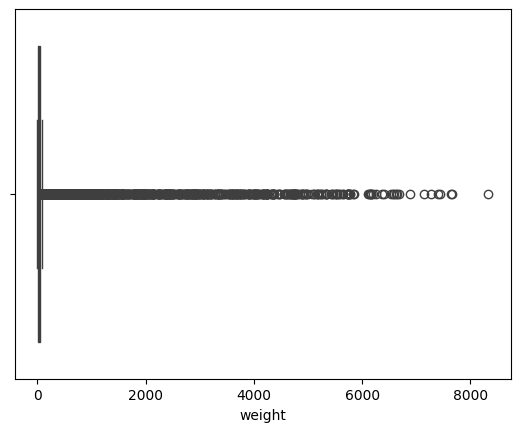

In [173]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.boxplot(x=cleaned_df['weight'])

In [174]:
cleaned_df.tail()

,source,target,weight,typetrans,fraud
594640,'C123623130','M349281107',22.44,'es_fashion',0
594641,'C1499363341','M1823072687',14.46,'es_transportation',0
594642,'C616528518','M1823072687',26.93,'es_transportation',0
594643,C10938261DD,M3489346DD,4.77,es_transportationDD,23
1783931,C10938261,M3489346,4.00,es_transportation,23


In [176]:
cleaned_df = cleaned_df[(cleaned_df['source'] != 'C10938261DD') & (cleaned_df['source'] != 'C10938261')]
cleaned_df = cleaned_df[(cleaned_df['target'] != 'M3489346DD') & (cleaned_df['target'] != 'M3489346')]
cleaned_df = cleaned_df[cleaned_df['weight'] != 4.77]
cleaned_df = cleaned_df[(cleaned_df['typetrans'] != 'es_transportationDD') & (cleaned_df['typetrans'] != 'es_transportation')]
cleaned_df = cleaned_df[cleaned_df['fraud'] != 23]


In [177]:
cleaned_df.tail()

,source,target,weight,typetrans,fraud
594638,'C1753498738','M1823072687',20.53,'es_transportation',0
594639,'C650108285','M1823072687',50.73,'es_transportation',0
594640,'C123623130','M349281107',22.44,'es_fashion',0
594641,'C1499363341','M1823072687',14.46,'es_transportation',0
594642,'C616528518','M1823072687',26.93,'es_transportation',0


In [178]:
cleaned_df.count()

source       590516
target       590516
weight       590516
typetrans    590516
fraud        590516
dtype: int64

In [179]:
weekend_df = cleaned_df

In [180]:
weekend_df.tail()

,source,target,weight,typetrans,fraud
594638,'C1753498738','M1823072687',20.53,'es_transportation',0
594639,'C650108285','M1823072687',50.73,'es_transportation',0
594640,'C123623130','M349281107',22.44,'es_fashion',0
594641,'C1499363341','M1823072687',14.46,'es_transportation',0
594642,'C616528518','M1823072687',26.93,'es_transportation',0


In [184]:
weekend_df

,source,target,weight,typetrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0
1,'C352968107','M348934600',39.68,'es_transportation',0
2,'C2054744914','M1823072687',26.89,'es_transportation',0
3,'C1760612790','M348934600',17.25,'es_transportation',0
4,'C757503768','M348934600',35.72,'es_transportation',0
...,...,...,...,...,...
594638,'C1753498738','M1823072687',20.53,'es_transportation',0
594639,'C650108285','M1823072687',50.73,'es_transportation',0
594640,'C123623130','M349281107',22.44,'es_fashion',0
594641,'C1499363341','M1823072687',14.46,'es_transportation',0


In [185]:
weekend_df.to_csv('weekend.csv', index=False, header=False)



PermissionError: [Errno 13] Permission denied: 'weekend.csv'